# Training a PPO policy with Stable Baselines 3.

We demonstrate how to train a PPO policy using the stable-baselines3 package.

First install and import the required packages:

In [1]:
%pip install --quiet --upgrade pip
%pip install --quiet stable-baselines3
%pip install --quiet git+https://github.com/pyrddlgym-project/rddlrepository.git
%pip install --quiet git+https://github.com/pyrddlgym-project/pyRDDLGym-rl.git

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import the required packages:

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import os
from IPython.display import Image
from stable_baselines3 import *

import pyRDDLGym
from pyRDDLGym.core.visualizer.movie import MovieGenerator

from pyRDDLGym_rl.core.agent import StableBaselinesAgent
from pyRDDLGym_rl.core.env import SimplifiedActionRDDLEnv

We will optimize the classical CartPole control problem. Note that in this case, we need to set the ``base_class`` to ``SimplifiedActionRDDLEnv``:

In [3]:
env = pyRDDLGym.make('CartPole_Continuous_gym', '0', base_class=SimplifiedActionRDDLEnv)

At this point, we could make the environment vectorized to speed up training if we wish. Now, let's train a PPO agent:

In [4]:
model = PPO('MultiInputPolicy', env, verbose=0)   
model.learn(total_timesteps=100000)

To evaluate the trained agent, we wrap it in a ``StableBaselinesAgent`` wrapper, which is an instance of pyRDDLGym's ``BaseAgent``:

In [5]:
agent = StableBaselinesAgent(model)

Lastly, we evaluate the agent as always:

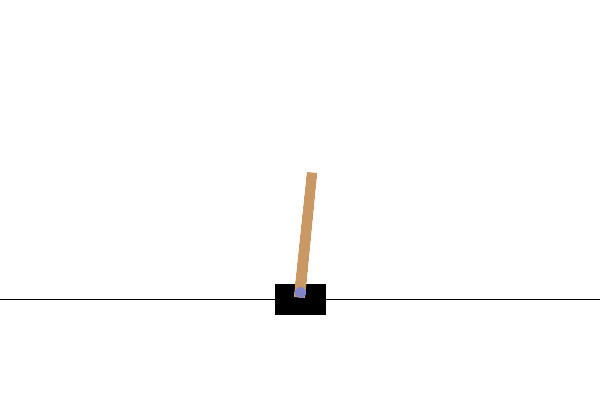

In [6]:
# for recording movies
if not os.path.exists('frames'):
    os.makedirs('frames')
recorder = MovieGenerator("frames", "cartpole_sb3", max_frames=env.horizon)
env.set_visualizer(viz=None, movie_gen=recorder)

agent.evaluate(env, episodes=1, render=True)
env.close()
Image(filename='frames/cartpole_sb3_0.gif') 